In [1]:
import matplotlib.pyplot as plt
# from matplotlib import rcParams
import seaborn as sns
import pandas as pd
import numpy as np

***Reading the Dataset***

In [2]:
df = pd.read_csv('./archive/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


***Check if any columns have Non-Numeric Values***

In [3]:
df.applymap(np.isreal).all(0)

C:\Users\Rahul Mondal\AppData\Local\Temp\ipykernel_11380\2276649592.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(np.isreal).all(0)


Pregnancies                 True
Glucose                     True
BloodPressure               True
SkinThickness               True
Insulin                     True
BMI                         True
DiabetesPedigreeFunction    True
Age                         True
Outcome                     True
dtype: bool

***Checking for Missing Values.***

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

***Checking a few statistical attributes such as mean, standard dev***

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


***Checking if the classes are evenly distributed***

In [6]:
df['Outcome'].value_counts().index

Index([0, 1], dtype='int64', name='Outcome')

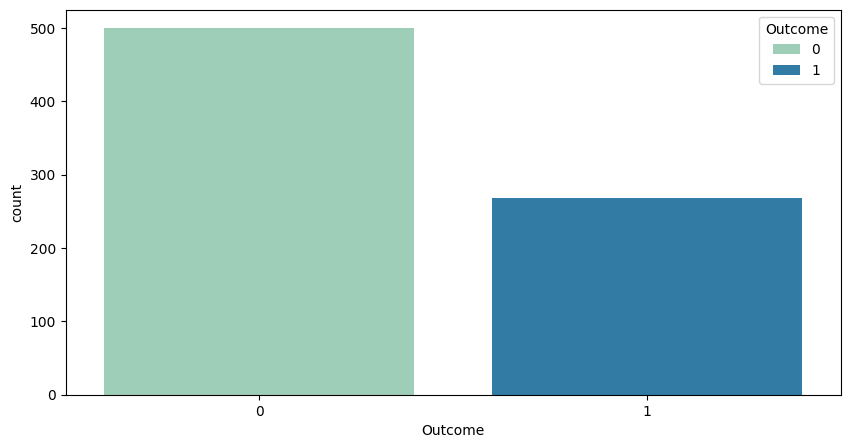

In [8]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df['Outcome'].value_counts().index, y=df['Outcome'].value_counts(), hue=df['Outcome'].value_counts().index, palette='YlGnBu')
plt.savefig('Target_Count.png')

In [9]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

From the above bar chart we can see that the classes are not balanced, there are more instanses of True than False.

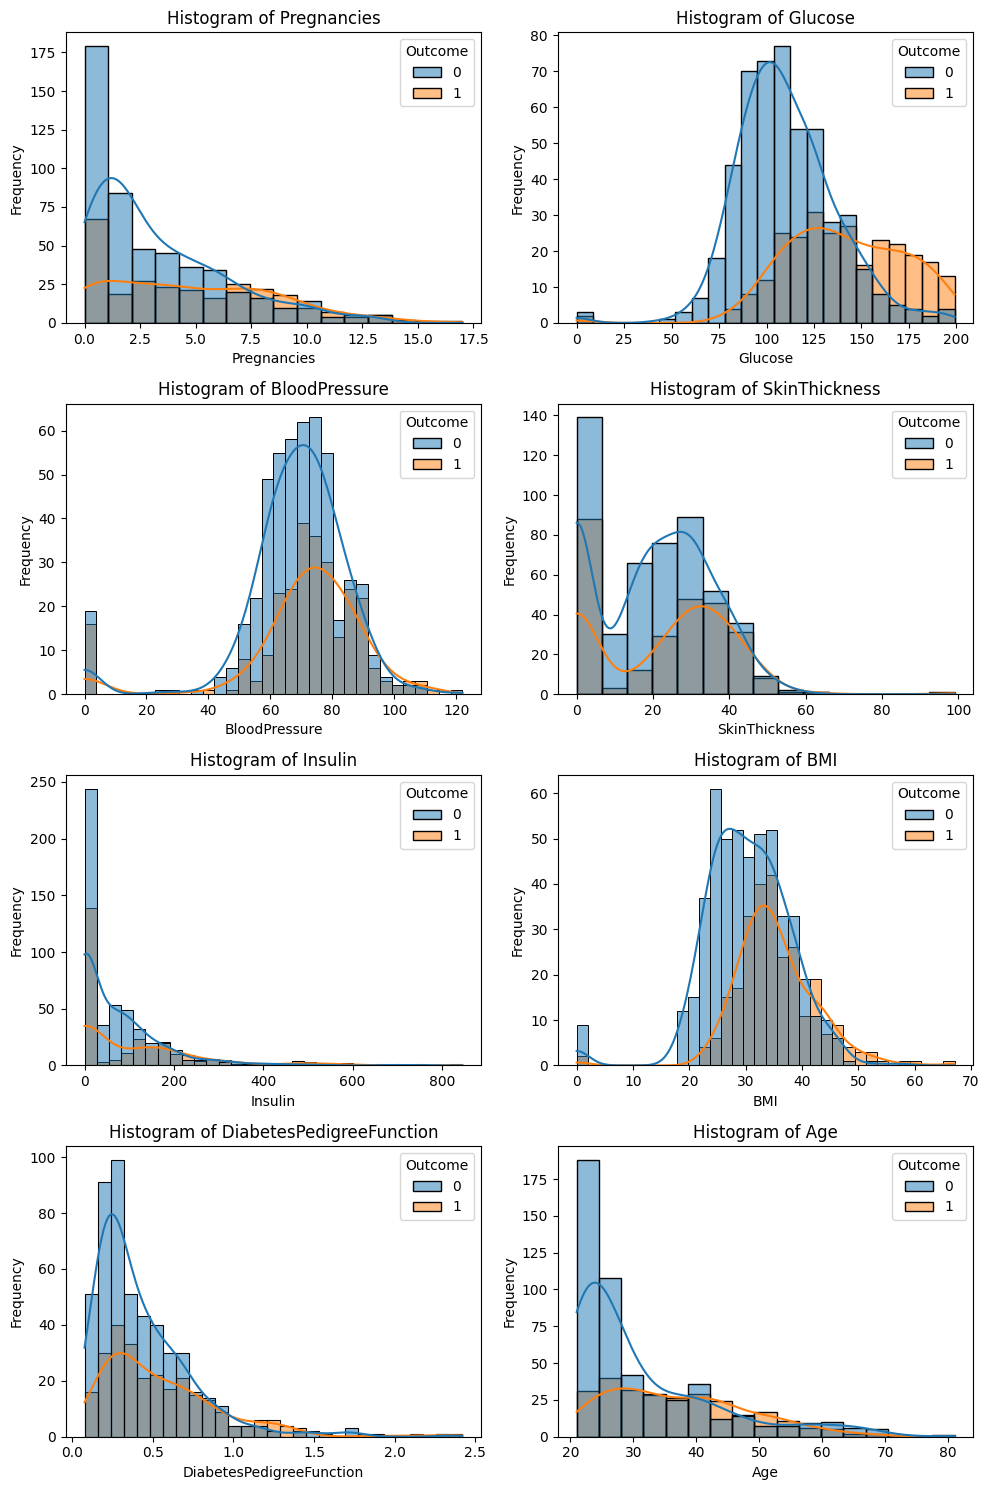

In [12]:
column_names = [column for column in df.loc[:,:'Age'].columns]
# column_names
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))

for i, column in enumerate(column_names):
    row = i // 2  
    col = i % 2  
    sns.histplot(data=df, x=column, ax=axs[row, col], hue=df['Outcome'], alpha=0.5, kde=True)
    axs[row, col].set_title(f'Histogram of {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

# Layout so plots do not overlap
plt.tight_layout()
plt.savefig('diabetes_histograms.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

***Check Correlation between attributes***

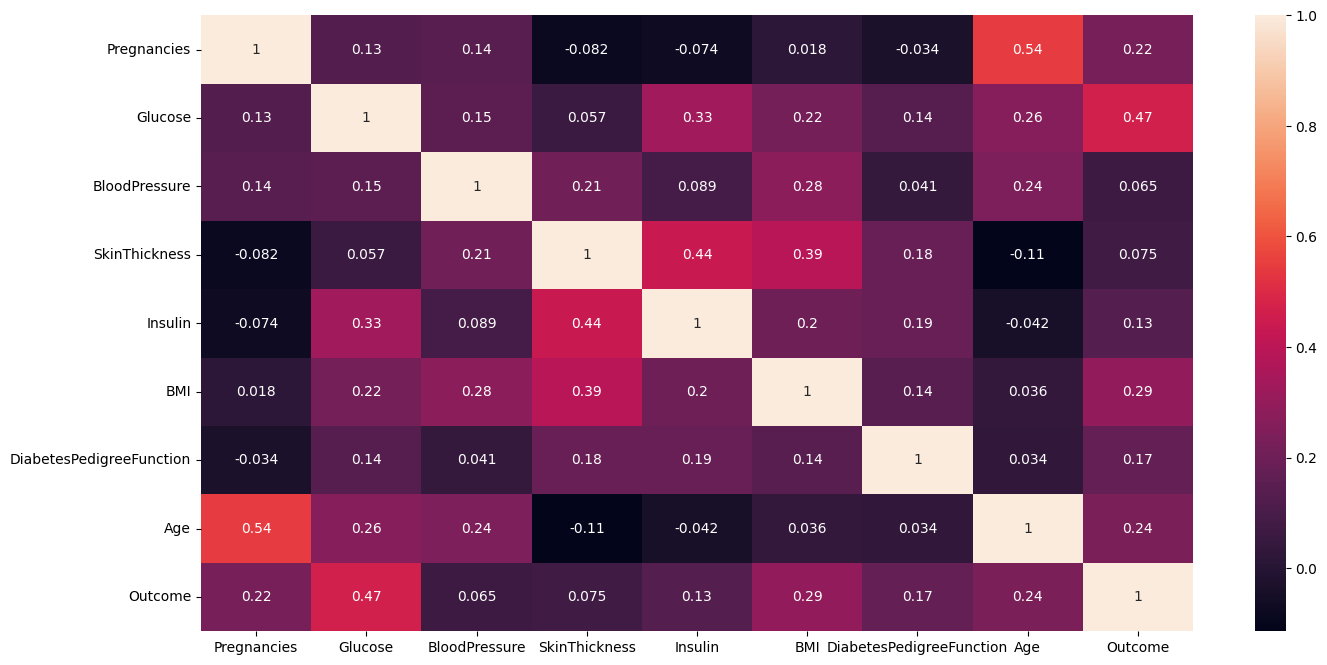

In [13]:
# calculate the correlation matrix on the numeric columns
corr = df.select_dtypes('number').corr()

# plot the heatmap
plt.figure(figsize=(16,8))
ax=sns.heatmap(corr, cmap='rocket', annot=True)
plt.savefig('diabetes_corrmat.png', dpi=300, bbox_inches='tight')

We can infer there is some correlation between AGE & PREGNANCIES, GLUCOSE & OUTCOME, INSULIN & SKIN THICKNESS and SKIN THICKNESS & BMI .

# Research Question 

***Is there a significant relationship between Glucose and the likelihood of developing diabetes, and how does this relationship vary across different age groups***

Lets look at the descriptive statistisc of Glucose

In [15]:
# df['Glucose'].describe()

nor_glu = df.loc[df['Outcome']==0, 'Glucose'].describe()
dia_glu = df.loc[df['Outcome']==1, 'Glucose'].describe()


***Visualizing the distribution of Glucose***

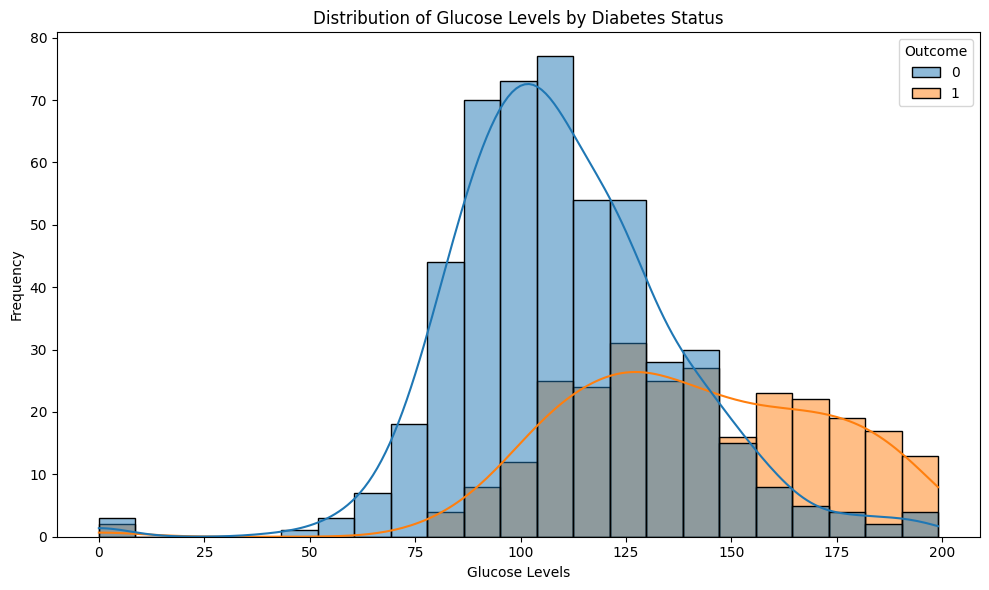

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Glucose', hue='Outcome', alpha=0.5, kde=True)

plt.title('Distribution of Glucose Levels by Diabetes Status')
plt.xlabel('Glucose Levels')
plt.ylabel('Frequency')

# Layout so plots do not overlap
plt.tight_layout()
plt.savefig('Glucose_Dist.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

## Hypothesis Testing

- ***Null Hypothesis (H0): There is no significant difference in Glucose between diabetic and non-diabetic patients.***
- ***Alternate Hypothesis (H1): There is significant difference in Glucose between diabetic and non-diabetic patients.***

In [24]:
non_diabetic_glucose = df.loc[df['Outcome'] == 0, 'Glucose']
diabetic_glucose = df.loc[df['Outcome'] == 1, 'Glucose']
non_diabetic_glucose.shape, diabetic_glucose.shape

((500,), (268,))

In [25]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(non_diabetic_glucose, diabetic_glucose)
print("T-statistic: {:.2f}, p-value: {:.3}".format(t_stat, p_val))

T-statistic: -14.60, p-value: 8.94e-43


- ***From the negative t-statistics we can say there is significant difference between the two groups.***
- ***Since p-value is significantly low that 0.05 we can reject the null hypothesis.***

***Now we will perform correlation analysis.***

In [26]:
# Correlation Analysis
correlation = df['Glucose'].corr(df['Outcome'])
print("Correlation between Glucose and Diabetes Outcome: {:.2f}".format(correlation))

Correlation between Glucose and Diabetes Outcome: 0.47


In [27]:
# Stratified Correlation by Age Group
# Create age groups
age_groups = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 80], labels=['20-29', '30-39', '40-49', '50-59', '60-79'])

df['AgeGroup'] = age_groups
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148,72,35,0,33.6,0.627,50,1,40-49
1,1,85,66,29,0,26.6,0.351,31,0,30-39
2,8,183,64,0,0,23.3,0.672,32,1,30-39
3,1,89,66,23,94,28.1,0.167,21,0,20-29
4,0,137,40,35,168,43.1,2.288,33,1,30-39
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,60-79
764,2,122,70,27,0,36.8,0.340,27,0,20-29
765,5,121,72,23,112,26.2,0.245,30,0,20-29
766,1,126,60,0,0,30.1,0.349,47,1,40-49


In [28]:
# mean_glucose_by_age = df.groupby('AgeGroup')['Glucose'].mean()
# Pivot the data to calculate mean glucose by age group and diabetes status
mean_glucose_by_age_diabetes = df.pivot_table(index='AgeGroup', columns='Outcome', values='Glucose', aggfunc='mean')

C:\Users\Rahul Mondal\AppData\Local\Temp\ipykernel_11380\4104187279.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  mean_glucose_by_age_diabetes = df.pivot_table(index='AgeGroup', columns='Outcome', values='Glucose', aggfunc='mean')


In [29]:
mean_glucose_by_age_diabetes

Outcome,0,1
AgeGroup,,
20-29,106.978593,140.322222
30-39,114.148148,139.000000
40-49,108.000000,137.812500
50-59,124.565217,153.451613
60-79,130.052632,155.285714


<Figure size 1000x1500 with 0 Axes>

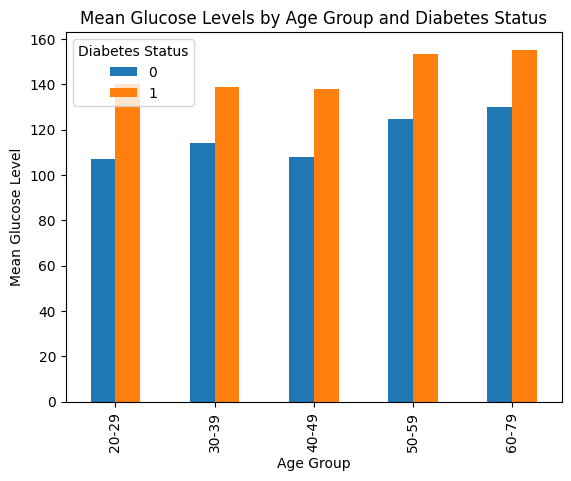

In [33]:
plt.figure(figsize=(10, 15))
mean_glucose_by_age_diabetes.plot(kind='bar')
plt.title('Mean Glucose Levels by Age Group and Diabetes Status')
plt.xlabel('Age Group')
plt.ylabel('Mean Glucose Level')
plt.legend(title='Diabetes Status')
plt.savefig('Mean_Glucoselevel_Age.png', dpi=300, bbox_inches='tight')
plt.show()

# We can see from the above chart that people who have had diabetes have higher Glucose leveL